In [14]:
import os 
import pathlib


In [18]:
path = r"D:\Jupyter Notebook\data\train"
path = pathlib.Path(path)
path

WindowsPath('D:/Jupyter Notebook/data/train')

In [19]:
mode_name = {
    "angry" : list(path.glob("angry/*")),
    "disgust" : list(path.glob("disgust/*")),
    "fear" : list(path.glob("fear/*")),
    "happy" : list(path.glob("happy/*")),
    "neutral" :list(path.glob("neutral/*")),
    "sad" : list(path.glob("sad/*")),
    "surprise" : list(path.glob("surprise/*")),
}

mode_label  = {
    "angry" : 0,
    "disgust" :1,
    "fear" : 2,
    "happy" : 3,
    "neutral" : 4,
    "sad" : 5,
    "surprise" : 6
}

In [20]:
count = 0
for key in mode_name.keys():
    count = count + len(mode_name[key])
count
    

28709

In [21]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread(str(mode_name["sad"][0]))

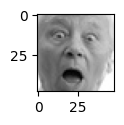

In [31]:
plt.figure(figsize = (5,1))
plt.imshow(img)

In [24]:
img.shape

(48, 48, 3)

In [25]:
X , y = [] , []

for mn , mv in mode_name.items():
    for mv_ in mv:
        img = cv.imread(mv_)
        X.append(img)
        y.append(mode_label[mn])
        

In [39]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [40]:
len(X_train) , len(X_test) , len(y_train) ,len(y_test)

(20096, 8613, 20096, 8613)

In [42]:
import pandas as pd

In [45]:
X = np.array(X)
y = np.array(y)

X.shape

(28709, 48, 48, 3)

In [53]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    #### CNN
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    ### Dense
    keras.layers.Flatten(),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(7,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [57]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3252 - loss: 1.6862
Epoch 2/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.3867 - loss: 1.5525
Epoch 3/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4670 - loss: 1.3841
Epoch 4/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5505 - loss: 1.2012
Epoch 5/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6292 - loss: 1.0049


In [64]:
y_pred = model.predict(X_test)

270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [75]:
np.argmax(y_pred[25])

np.int64(5)

In [76]:
y_test[25]

np.int64(5)

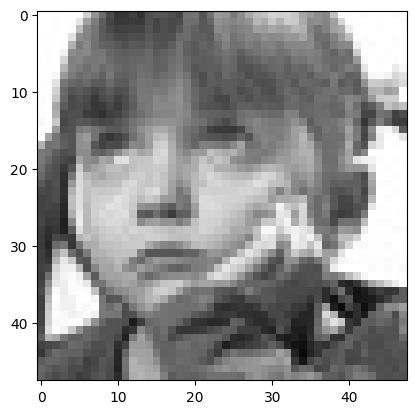

In [77]:
plt.imshow(X_test[25])

In [70]:
mode_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}